## Подключаем все наши библиотеки и проверяем что они запускаются

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Признаки:

* season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
* yr: 0 - 2011, 1 - 2012
* mnth: месяц от 1 до 12
* holiday: 0 - нет праздника, 1 - есть праздник
* weekday: от 0 до 6
* workingday: 0 - нерабочий день, 1 - рабочий день
* weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* temp: температура в Цельсиях
* atemp: температура по ощущениям в Цельсиях
* hum: влажность
* windspeed(mph): скорость ветра в милях в час
* windspeed(ms): скорость ветра в метрах в секунду
* cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

## Задания

### Загрузите датасет и проведите анализ данных

#### Выведите первые 5 строк

In [3]:
data = pd.read_csv("bikes_rent.csv")
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


#### Выведите информацию о наборе

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


#### Размер набора (shape)

In [5]:
data.shape

(731, 13)

#### Посмотрите есть ли пропуски и дубликаты

In [6]:
data.isnull().sum()

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

In [7]:
data.duplicated().sum()

0

#### Посмотрите есть ли выбросы

In [8]:
data_number = data.select_dtypes(include=[np.number])
print(data_number.columns.values)
data_str = data.select_dtypes(exclude=[np.number])
print(data_str.columns.values)

['season' 'yr' 'mnth' 'holiday' 'weekday' 'workingday' 'weathersit' 'temp'
 'atemp' 'hum' 'windspeed(mph)' 'windspeed(ms)' 'cnt']
[]


In [9]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

season - 0%
yr - 0%
mnth - 0%
holiday - 0%
weekday - 0%
workingday - 0%
weathersit - 0%
temp - 0%
atemp - 0%
hum - 0%
windspeed(mph) - 0%
windspeed(ms) - 0%
cnt - 0%


#### Постройте графики для анализа набора данных: в какие дни (праздничные или нет, рабочие дни или нет) аренда больше, в какой год и какие месяца как проходит аренда, при какой погоде больше арендуют велосипедов

Text(0, 0.5, 'Количество велосипедов')

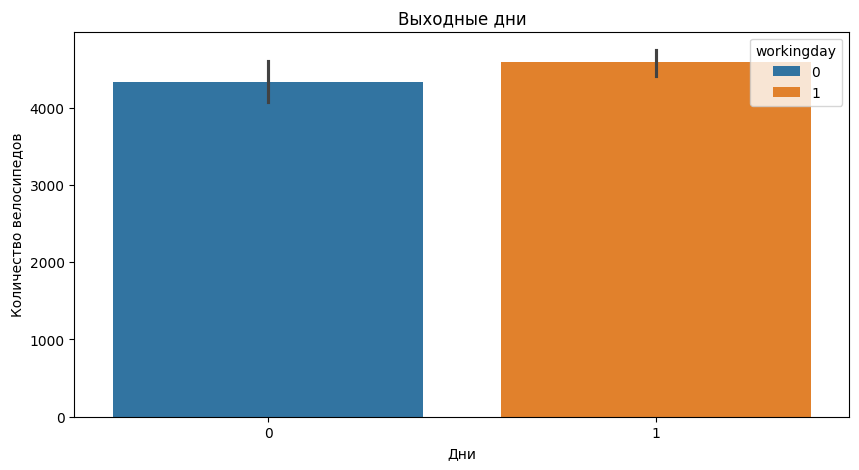

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x='workingday', y='cnt', hue='workingday',  data=data_number)
plt.title('Выходные дни')
plt.xlabel('Дни')
plt.ylabel('Количество велосипедов')

Text(0, 0.5, 'Количество велосипедов')

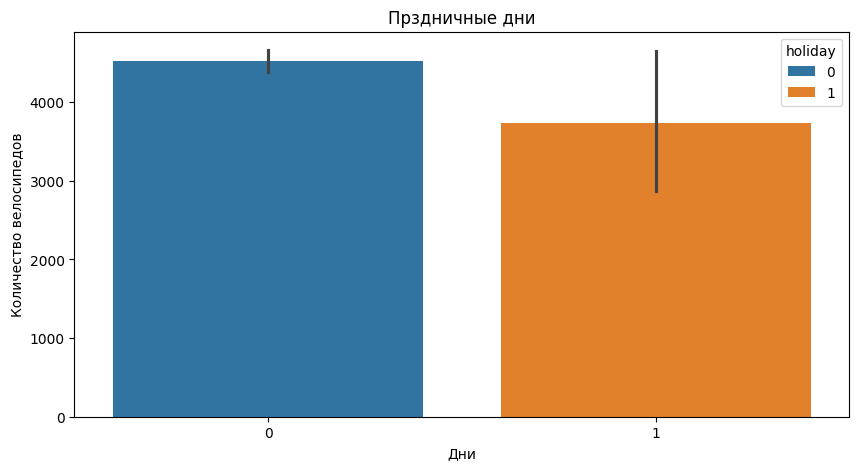

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x='holiday', y='cnt', hue='holiday',  data=data_number)
plt.title('Прздничные дни')
plt.xlabel('Дни')
plt.ylabel('Количество велосипедов')

Text(0, 0.5, 'Количество велосипедов')

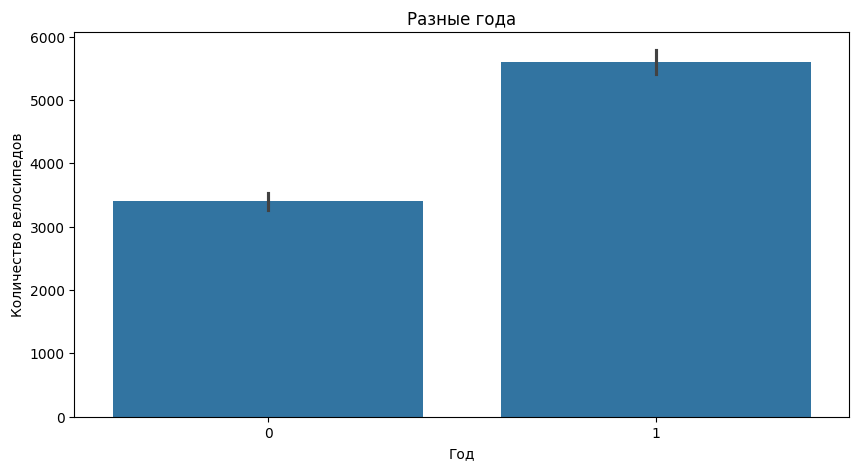

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x='yr', y='cnt', data=data_number)
plt.title('Разные года')
plt.xlabel('Год')
plt.ylabel('Количество велосипедов')

Text(0, 0.5, 'Количество велосипедов')

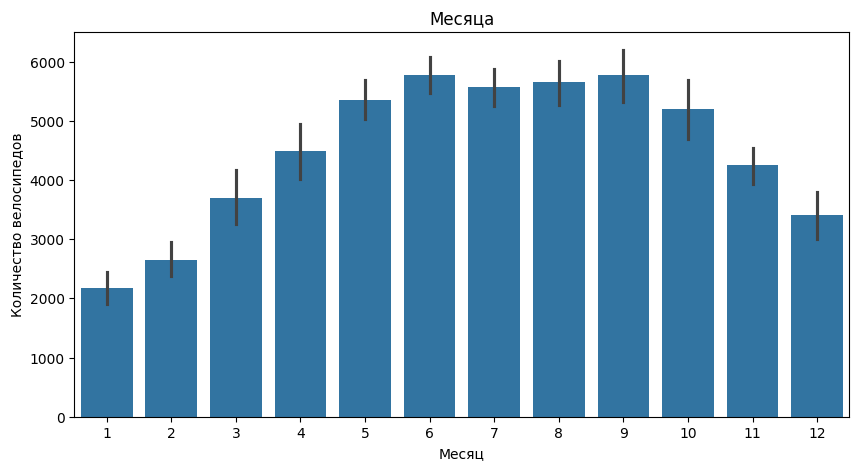

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x='mnth', y='cnt', data=data_number)
plt.title('Месяца')
plt.xlabel('Месяц')
plt.ylabel('Количество велосипедов')

Text(0, 0.5, 'Количество велосипедов')

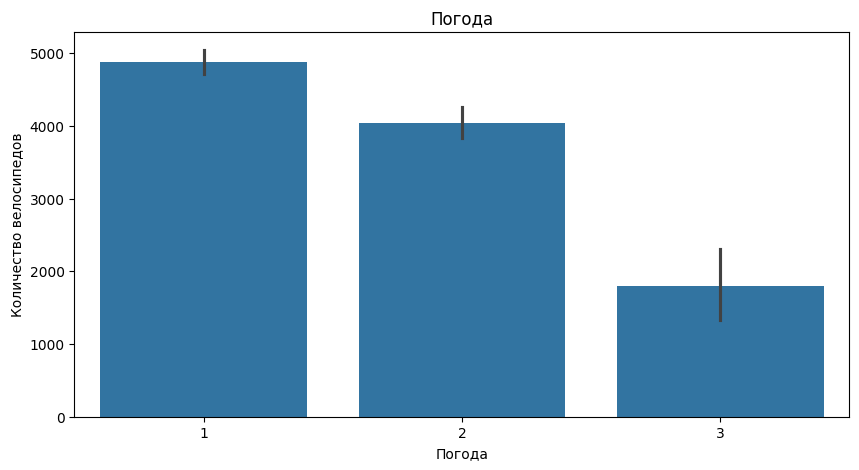

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weathersit', y='cnt', data=data_number)
plt.title('Погода')
plt.xlabel('Погода')
plt.ylabel('Количество велосипедов')

#### Постройте матрицу корреляции, сделайте по ней выводы

<Axes: >

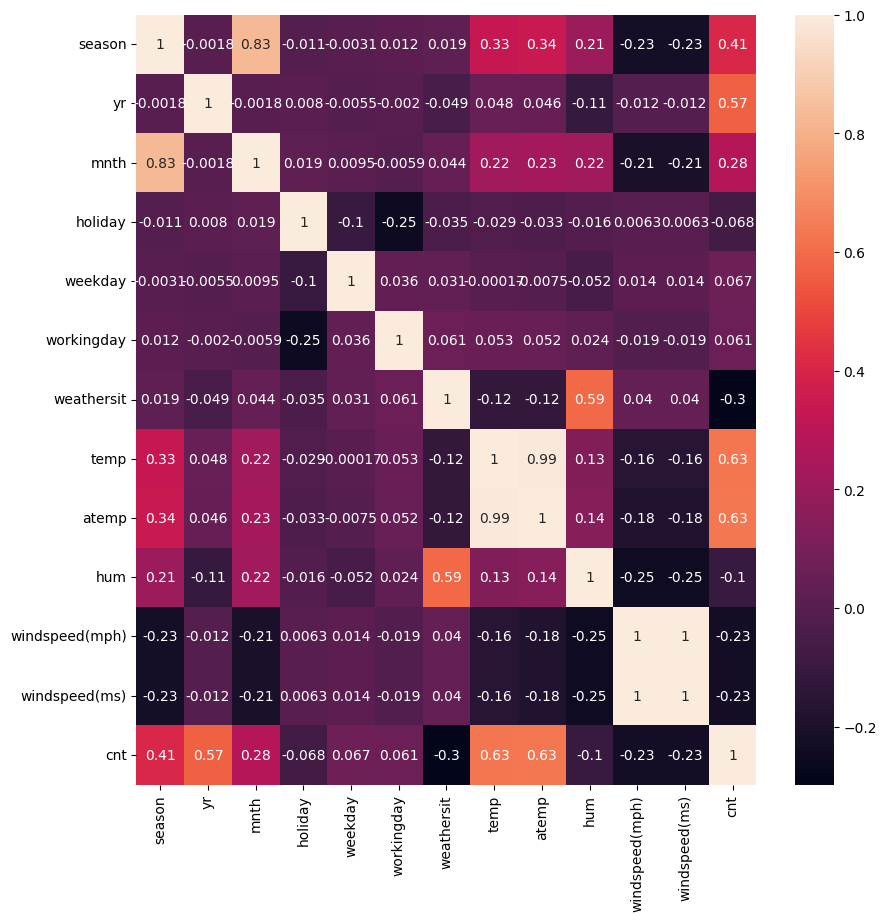

In [16]:
correlation_matrix = data_number.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot=True)

### Проведите предобработку данных

#### Удалите дубликаты, если они есть

#### Удалите выбросы, если они есть

#### Если есть необходимость, то удалите  признаки

In [17]:
data = data.drop(["windspeed(mph)", "atemp"], axis=1)

#### Обновите индексы, если было удаление строк

In [18]:
data.reset_index(drop=True, inplace=True)

#### В двух копиях данных сделайте два варианта приведения признаков к одному масштабу: нормализация (MinMaxScaller), стандартизация (StandartScaller)